Building a linear model to express the relationship between a car's milage(mpg) and other attributes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps to split the data into parts

%matplotlib inline


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

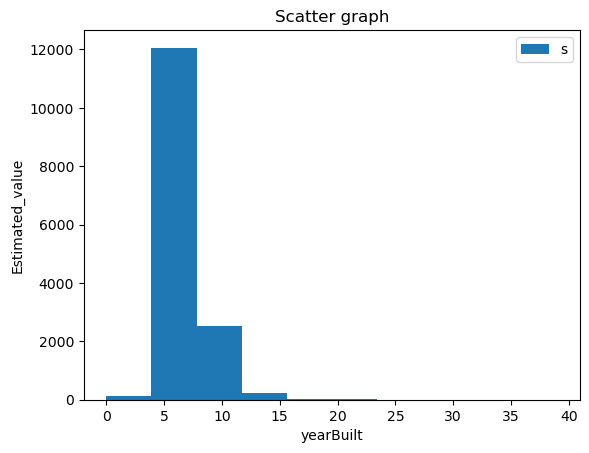

,count,mean,std,min,25%,50%,75%,max
id,15000.0,5.176229e+07,6.190876e+07,143367.000000,1.004802e+07,2.563241e+07,5.114222e+07,3.209481e+08
zipcode,15000.0,8.020492e+04,9.715263e+00,80022.000000,8.020500e+04,8.020600e+04,8.020700e+04,8.020900e+04
latitude,14985.0,3.974054e+01,2.355548e-02,39.614531,3.972763e+01,3.974805e+01,3.975821e+01,3.988802e+01
longitude,14985.0,-1.049641e+02,3.978829e-02,-105.108440,-1.049787e+02,-1.049577e+02,-1.049375e+02,-1.048309e+02
bedrooms,15000.0,2.708400e+00,8.972308e-01,0.000000,2.000000e+00,3.000000e+00,3.000000e+00,1.500000e+01
bathrooms,15000.0,2.195067e+00,1.166279e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01
rooms,15000.0,6.164133e+00,1.958601e+00,0.000000,5.000000e+00,6.000000e+00,7.000000e+00,3.900000e+01
squareFootage,15000.0,1.514504e+03,8.306360e+02,350.000000,9.860000e+02,1.267500e+03,1.766250e+03,1.090700e+04
lotSize,15000.0,5.820766e+03,3.013279e+03,278.000000,4.620000e+03,5.950000e+03,6.270000e+03,1.228390e+05
yearBuilt,14999.0,1.929517e+03,2.993705e+01,1874.000000,1.907000e+03,1.925000e+03,1.949000e+03,2.016000e+03


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("single_family_home_values.csv")
data.head()
data.info()
data.describe()
data.shape
# sns.boxplot(data.rooms)
# sns.lmplot(x ='yearBuilt', y ='rooms', data =data, fit_reg =True)
# plt.scatter(data.yearBuilt, data.estimated_value)
plt.hist(data.rooms)
plt.title('Scatter graph')
plt.xlabel('yearBuilt')
plt.ylabel('Estimated_value')
plt.legend('scatter legend')
plt.show()

data.describe().T
# data['lastSaleAmount'].corr(data['priorSaleAmount'])


If you want to use above libraries, use one statement
from pyforest import*
lazy_imports()

In [3]:
Data =pd.read_csv("auto-mpg.csv")
Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
Data.shape
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


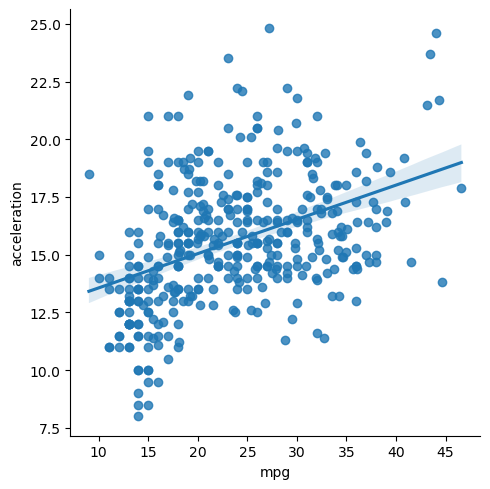

In [68]:
sns.lmplot(x ='mpg', y ='acceleration', data =Data, fit_reg =True) #use fit_reg to turn on/off the regression line
plt.show()

In [27]:
Data['mpg'].corr(Data['acceleration']) #shows positive correlation

0.42028891210165065

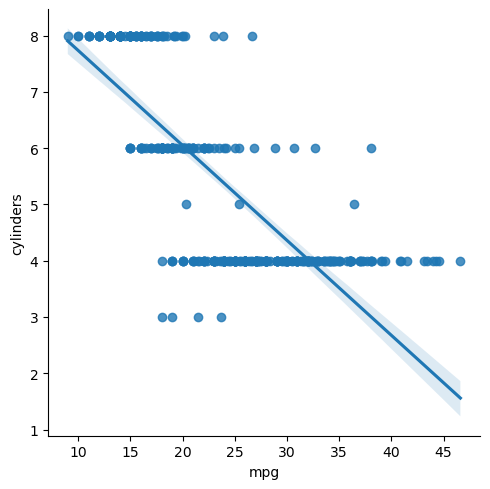

In [34]:
sns.lmplot(x ='mpg', y ='cylinders', data =Data)
plt.show()

In [36]:
Data['mpg'].corr(Data['cylinders'])
#shows the negative correlation

-0.7753962854205543

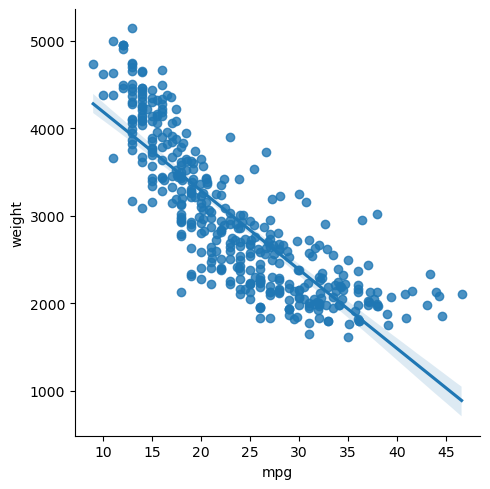

In [39]:
sns.lmplot(x ='mpg', y ='weight', data =Data, fit_reg =True)
plt.show()

In [41]:
Data['mpg'].corr(Data['weight']) #negative correlation

-0.8317409332443351

Strong positive correlation
Moderate positive correlation
No correlation

Modelate negative correlation
Strong negative correlation
Curvilinear correlation(both pstive and negative)

In [45]:
Data.describe() #works on the numerical columns (without Transponse, T)


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [3]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [49]:
Data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#drop the car_name
df =Data.drop('car name', axis =1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
#replacing the categorical var with actual values
df['origin'] =df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
5,15.0,8,429.0,198,4341,10.0,70,america
6,14.0,8,454.0,220,4354,9.0,70,america
7,14.0,8,440.0,215,4312,8.5,70,america
8,14.0,8,455.0,225,4425,10.0,70,america
9,15.0,8,390.0,190,3850,8.5,70,america


In [5]:
#converting categorical variables to dummy variables 
df =pd.get_dummies(df, columns=['origin'])



In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
#Dealing with missing values
df.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
df.dtypes #determines the datatypes
#hp is missing coz its not recognized as numerical column
#Thus test using isdigit() function

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [12]:
digits_in_hp =pd.DataFrame(df.horsepower.str.isdigit())
# digits_in_hp

In [13]:
#print isDigit =False
df[digits_in_hp['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [14]:
df =df.replace('?', np.nan)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


C:\Users\HENRY\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

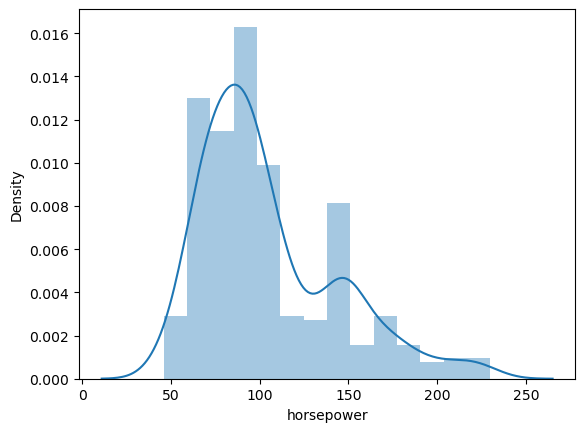

In [15]:
#Handling missing data without chopping them
sns.distplot(df['horsepower'])
#for skewed distribution, we cannot use mean, but rather median


In [22]:
#fill the missing values with the median of each column
# df =df['horsepower'].fillna(df['horsepower'].median())
df
df.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [20]:
#converting the hp column from object/string type to float
df['horsepower'] =df['horsepower'].astype('float64')


dtype('O')

In [23]:
df

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [23]:
df.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object